# Plot samples from GW specific sampling

The purpose of this notebook is to plot the samples from standard MCMC sampling of GW events

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.path.append("/Users/sperkins/dev/BayesShip/python/")
import bayesshippy.mcmcRoutines as mcmc
from corner import corner, overplot_lines
import os
import h5py
import emcee

## Read in data

In [2]:
print("Reading in file: ../data/GW_injection_output.hdf5")
run = mcmc.MCMCOutput("../data/GW_injection_output.hdf5")
print(r'$\beta$ parameters (1/T) for each chain in the run: ',run.betaSchedule)
betaID =0
print(r'Loading data for $\beta$ =',run.betaSchedule[betaID])
beta = run.betaSchedule[betaID]
dataObj = run.unpackMCMCData(betaID = betaID,sizeCap=2e4,thin=None,trim=None)
print("Total samples",len(dataObj["data"]))


dataObj["data"].loc[:,"Parameter 7"] = np.exp(dataObj["data"].loc[:,"Parameter 7"])
dataObj["data"].loc[:,"Parameter 6"] = np.exp(dataObj["data"].loc[:,"Parameter 6"])

labels = [r'$\alpha$',r'$\sin \delta$',r'$\psi$',r'$\cos \iota$',
          r'$\phi_{\rm Ref}$',r'$t_c$',r'$D_L$',r'$\mathcal{M}$',
          r'$\eta$',r'$\chi_1$',r'$\chi_2$']

Reading in file: ../data/GW_injection_output.hdf5
$\beta$ parameters (1/T) for each chain in the run:  [1.         0.73439013 0.52737294 0.37607308 0.27603287 0.20309143
 0.14739809 0.09275209 0.05881109 0.05291701 0.04812604 0.03926258
 0.02429282 0.01006116 0.        ]
Loading data for $\beta$ = 1.0
Total samples 635


In [3]:
print("Loading injected (true) values)")
injections = np.loadtxt("../data/injections.csv")
injections[6] = np.exp(injections[6])
injections[7] = np.exp(injections[7])

Loading injected (true) values)


## Corner Plot

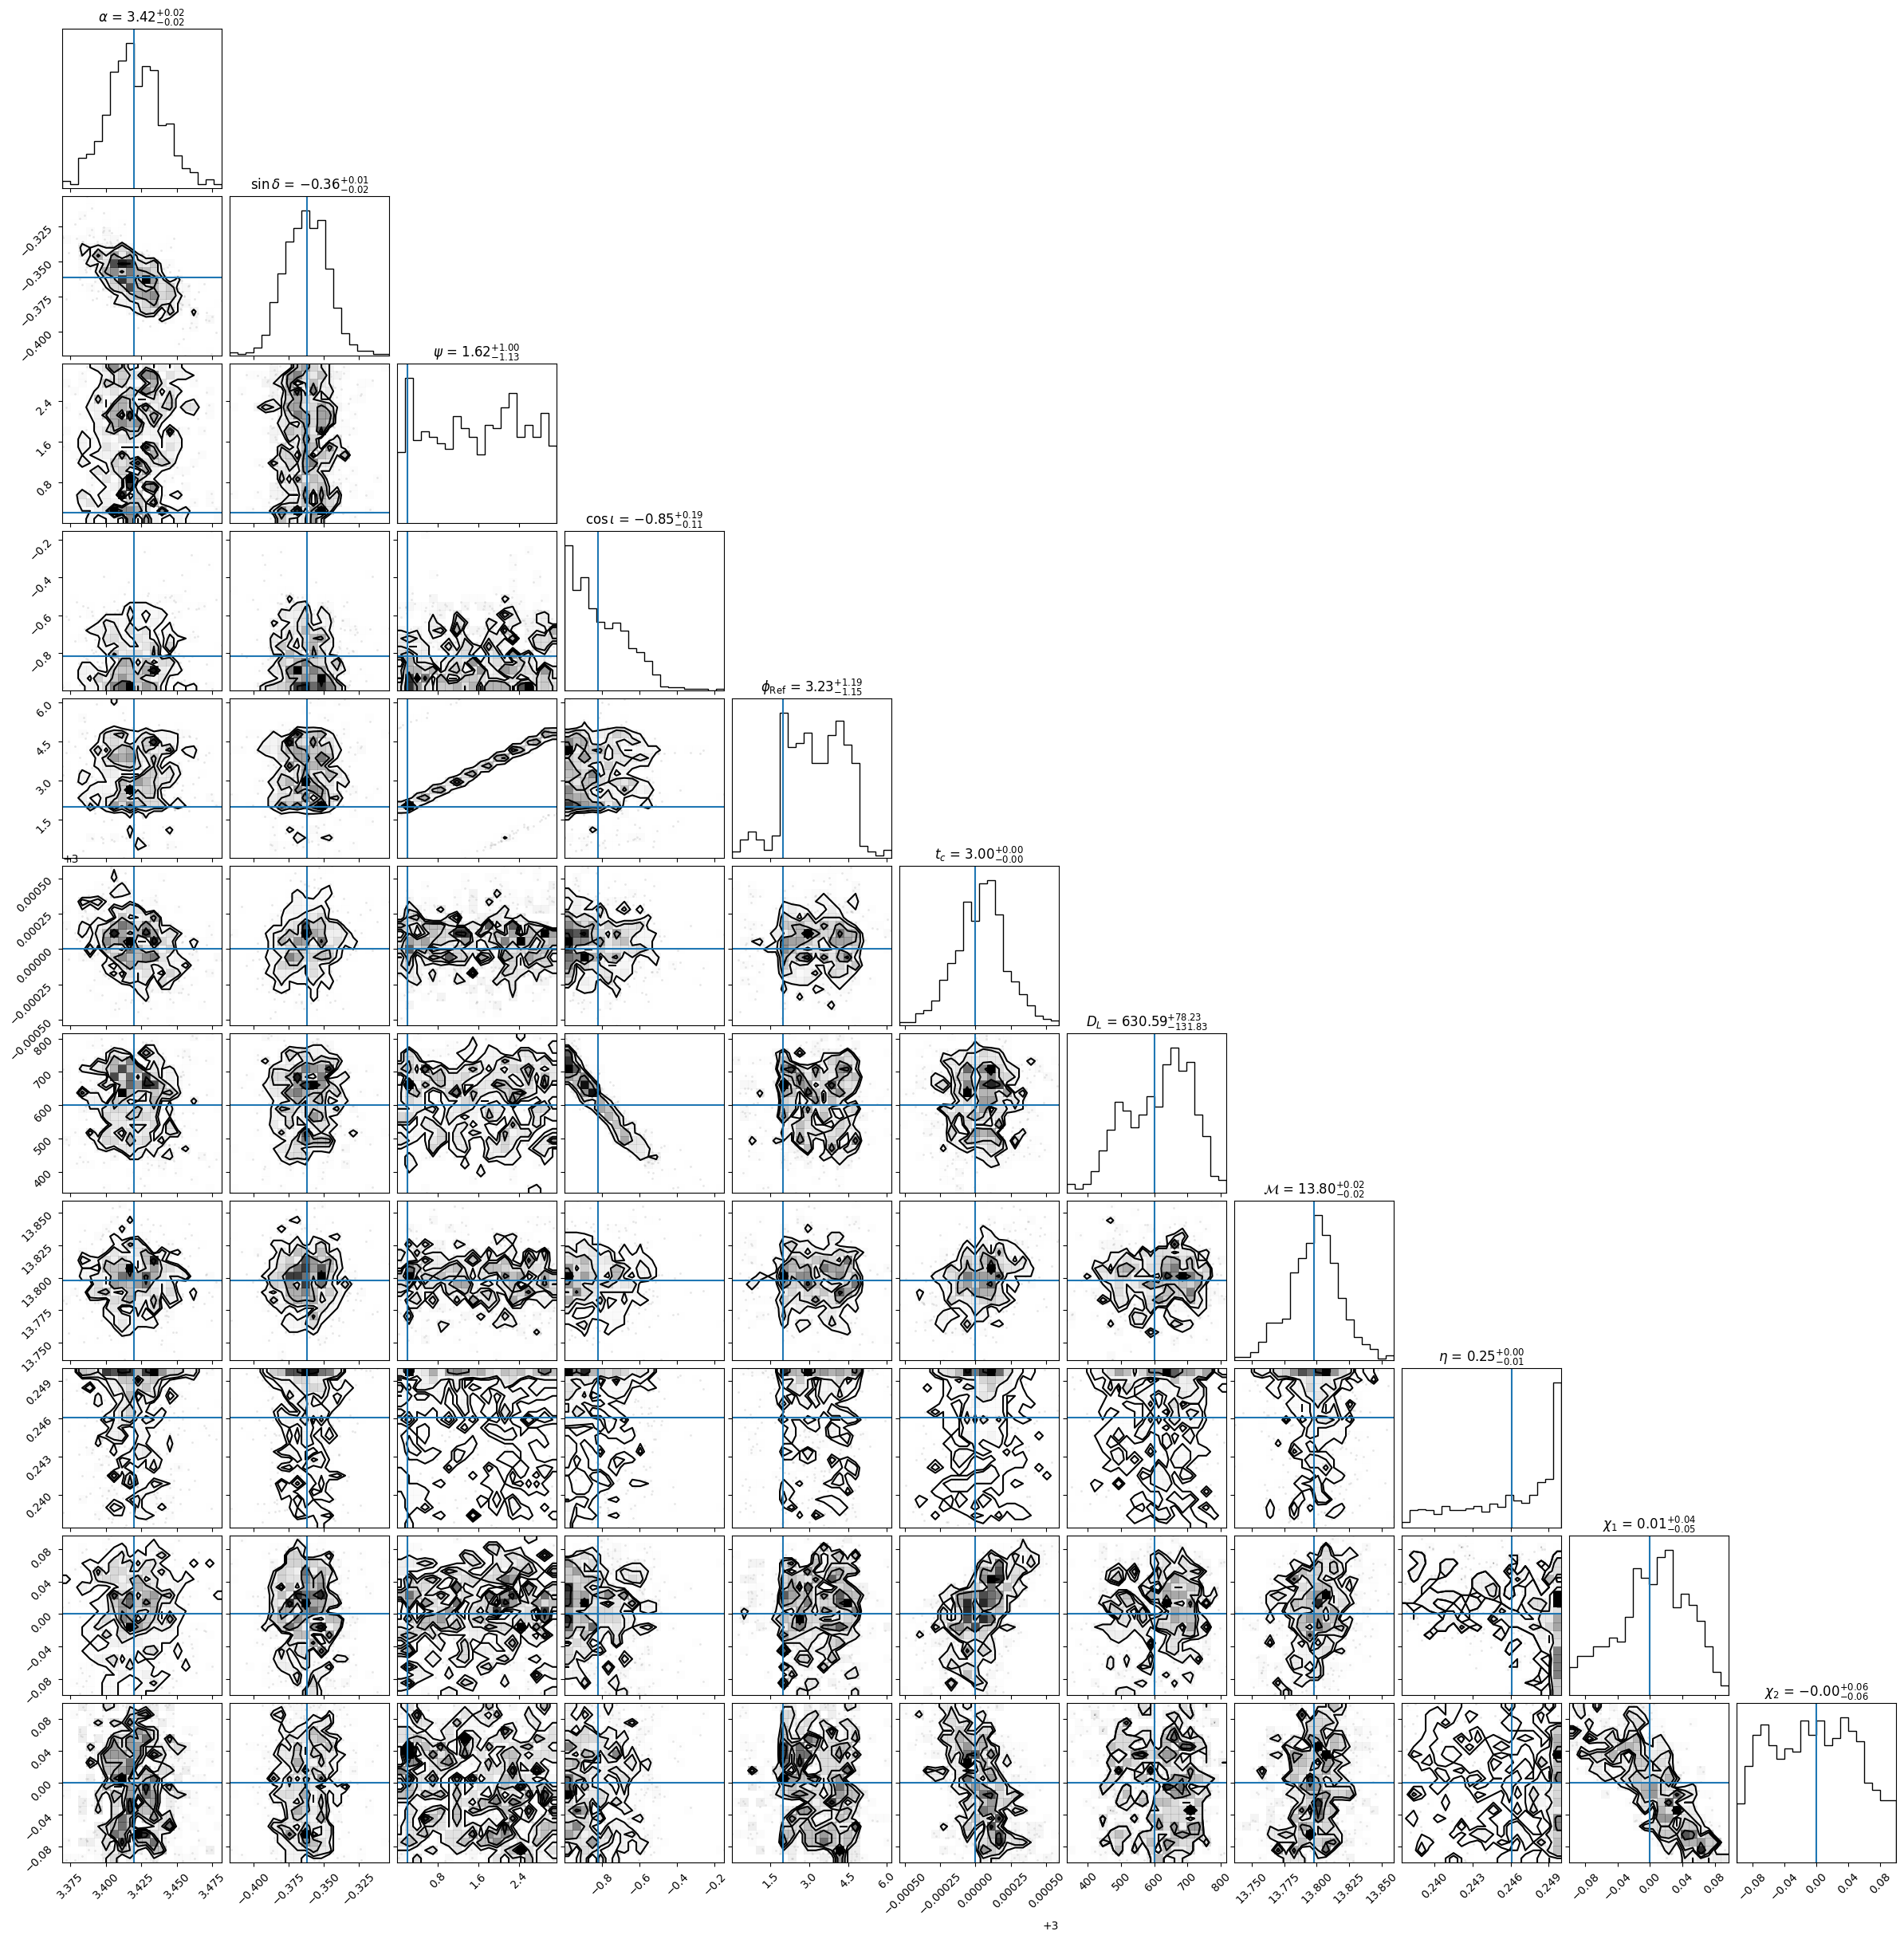

In [4]:
figure = corner(dataObj["data"],show_titles=True, titles=labels)
overplot_lines(figure, injections)
plt.show()
plt.close()

## Trace Plots

[1.55124875]


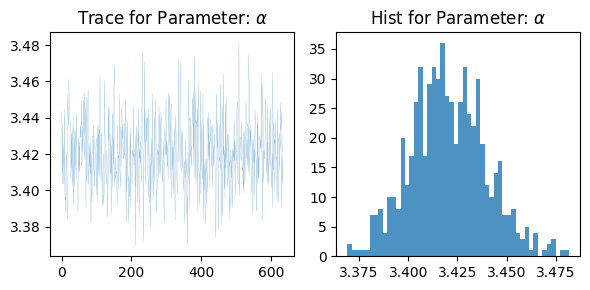

##################################################
[1.02388757]


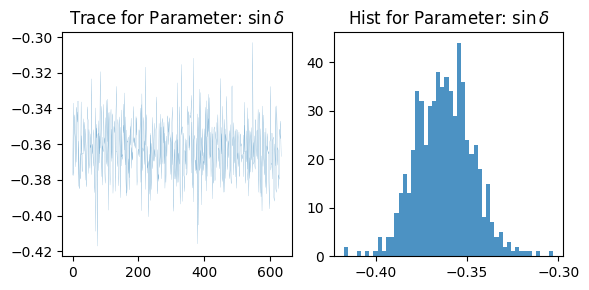

##################################################
[1.23602232]


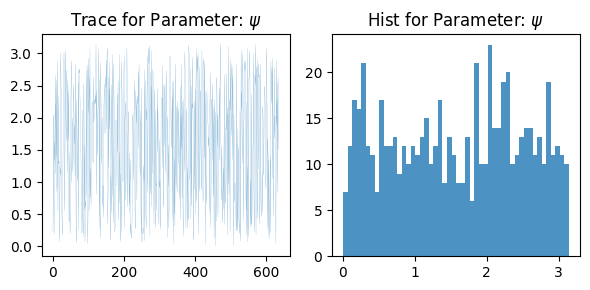

##################################################
[1.51048201]


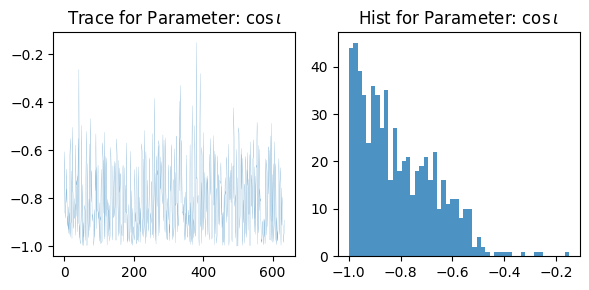

##################################################
[1.30640894]


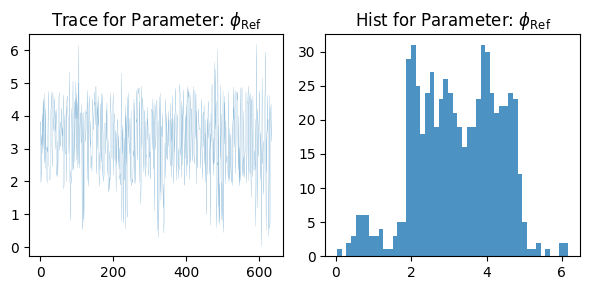

##################################################
[1.30860496]


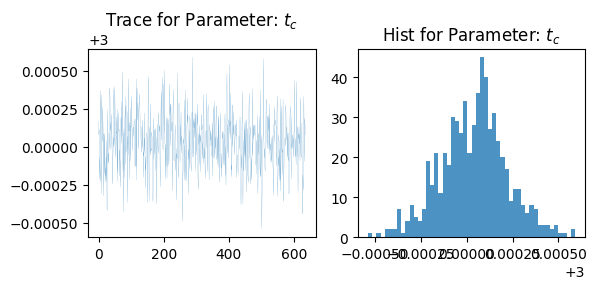

##################################################
[1.39338464]


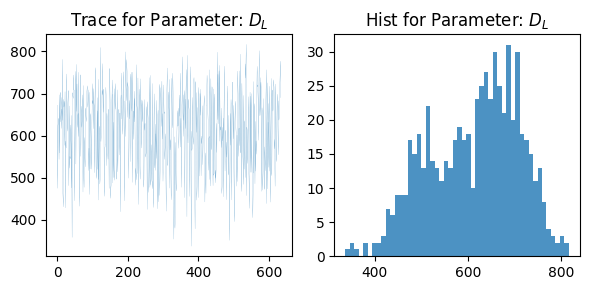

##################################################
[1.10432065]


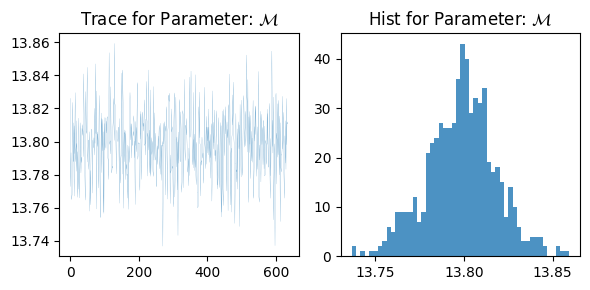

##################################################
[1.34600483]


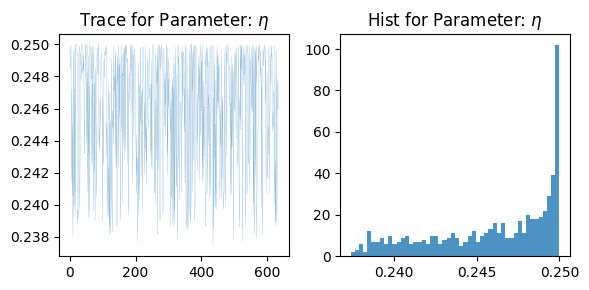

##################################################
[1.11057641]


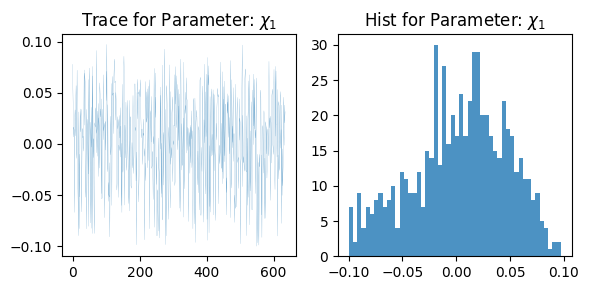

##################################################
[1.15389126]


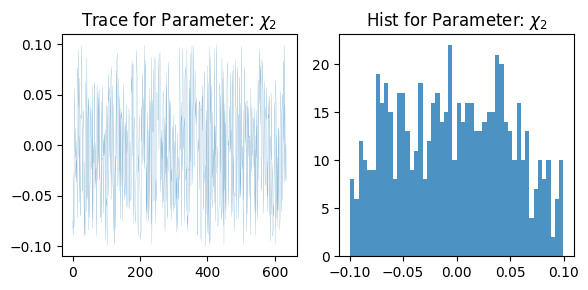

##################################################


In [6]:
for ID in np.arange(len(dataObj["data"].iloc[0])):
    data = dataObj["data"]
    
    print(emcee.autocorr.integrated_time(data.iloc[:,ID],tol=1))
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=[6,3])
    # ax[0].scatter(np.arange(len(datafull[0][np.array(datafull[1][:,ID],dtype=bool)])),datafull[0][np.array(datafull[1][:,ID],dtype=bool),ID],s=.01)
    ax[0].plot(data.iloc[:,ID],linewidth=.1)

    ax[0].set_title("Trace for Parameter: {}".format(labels[ID]))


    ax[1].hist(data.iloc[:,ID],bins=50,alpha=.8, label='posterior density')
    # ax[1].legend()
    ax[1].set_title("Hist for Parameter: {}".format(labels[ID]))
    plt.tight_layout()
    
    plt.show()
    plt.close()
    print(50*"#")

## AC Plots

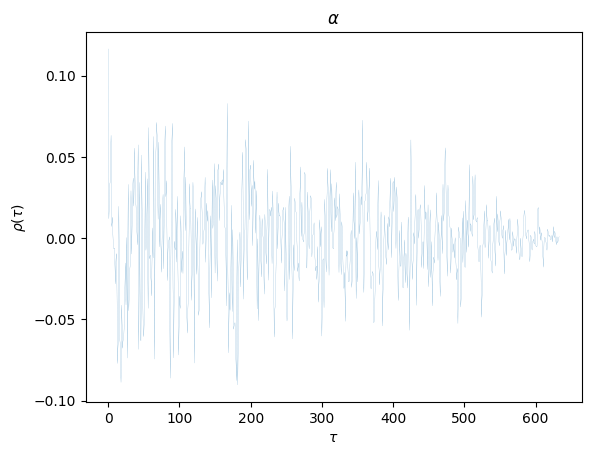

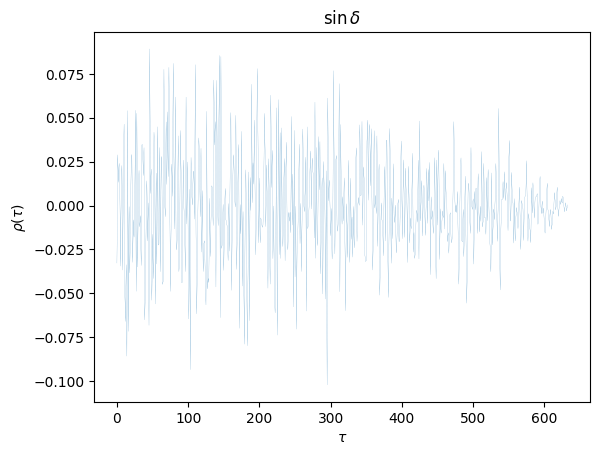

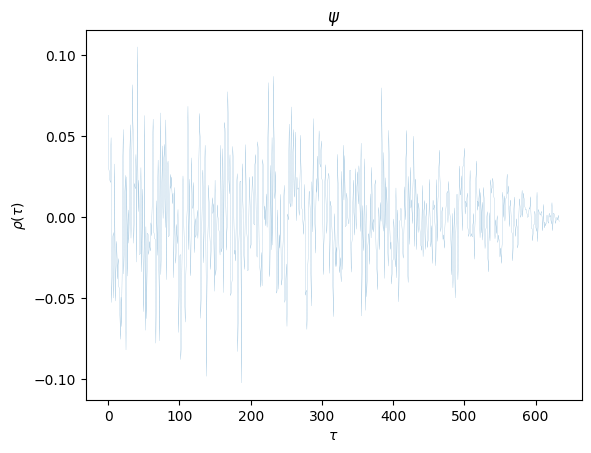

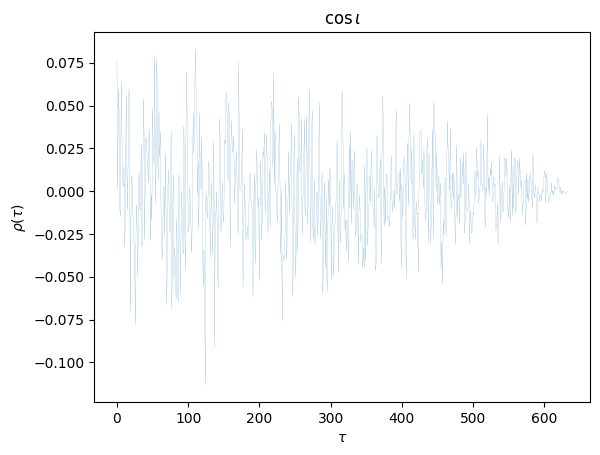

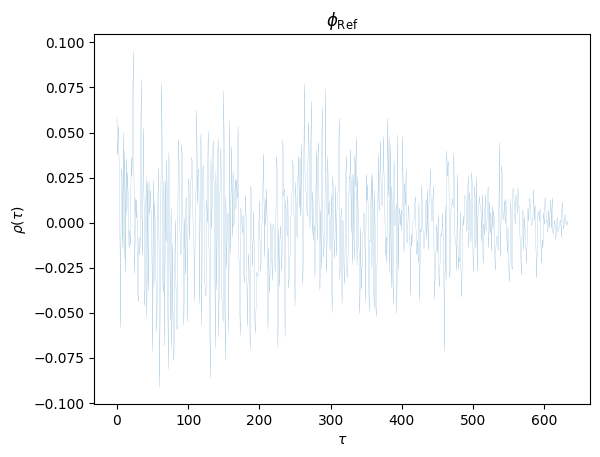

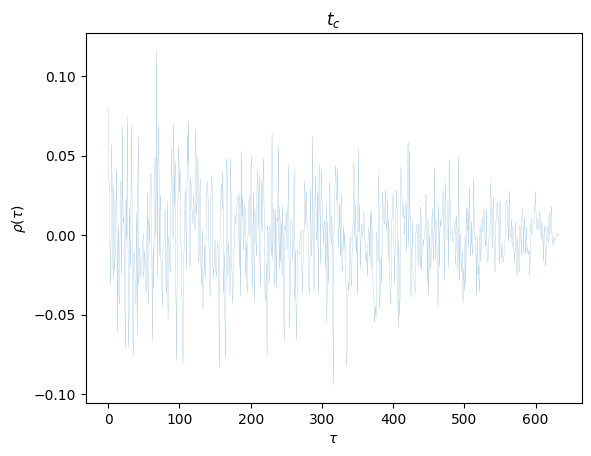

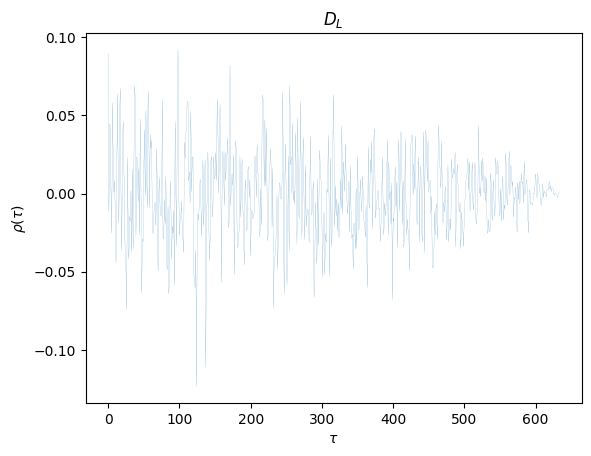

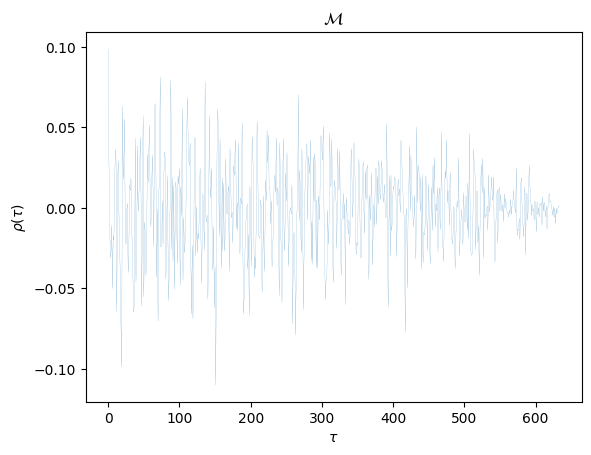

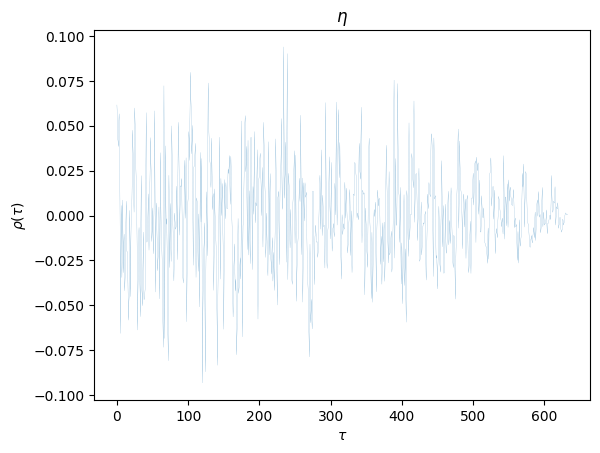

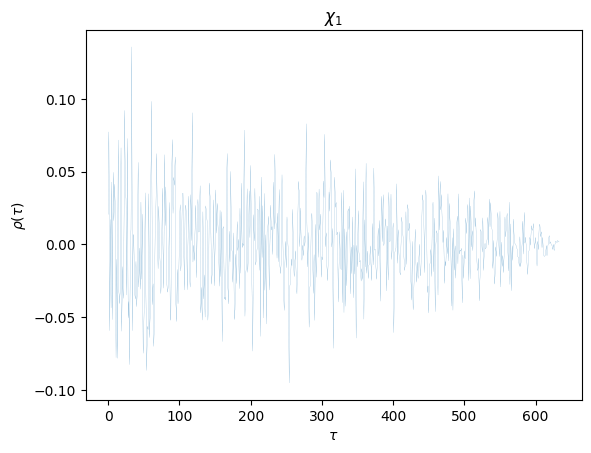

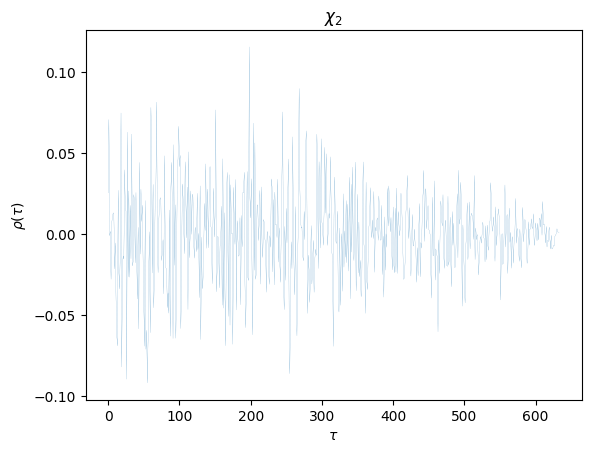

In [7]:
for i in np.arange(len(dataObj["data"].iloc[0])):
    ac =emcee.autocorr.function_1d(dataObj["data"].loc[:,"Parameter {}".format(i)].to_numpy() )

    plt.plot(ac[1:],linewidth=.1)
    plt.title(labels[i])
    plt.xlabel(r'$\tau$')
    plt.ylabel(r'$\rho(\tau)$')

    
    plt.show()
    plt.close()

## $\ln$ Likelihood/Prior/Posterior Trace Plots

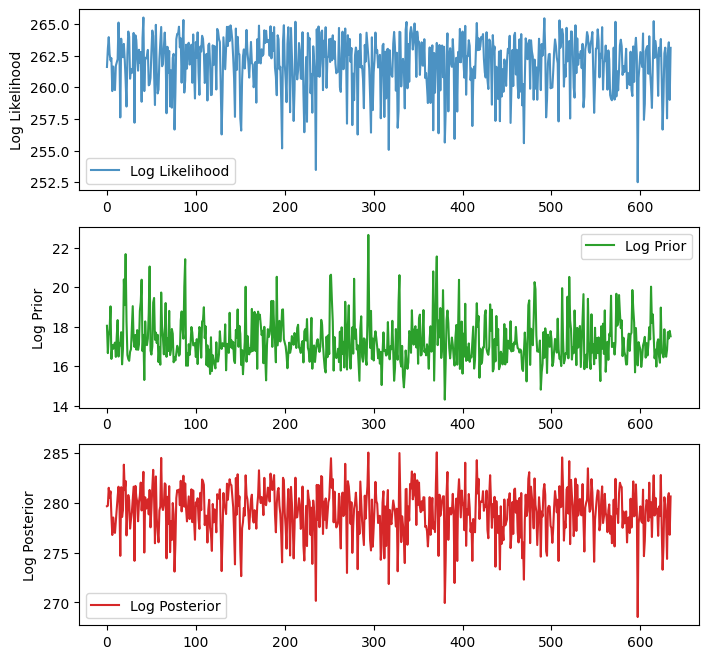

In [8]:
# ll = dataObj["logL"][mask]
# lp = dataObj["logP"][mask]
ll = dataObj["logL"]
lp = dataObj["logP"]
 
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[8,8])
# ax[0].axhline(200,color='red',label='Theoretical Max')
ax[0].plot(ll,alpha=.8, label="Log Likelihood",color='tab:blue')
ax[0].set_ylabel("Log Likelihood")
ax[0].legend()
ax[1].plot(lp, label="Log Prior",color='tab:green')
ax[1].set_ylabel("Log Prior")
ax[1].legend()

ax[2].plot(lp+ll, label="Log Posterior",color='tab:red')
ax[2].set_ylabel("Log Posterior")
ax[2].legend()

plt.show()
plt.close()